In [ ]:
!pip install tifffile

     |████████████████████████████████| 133kB 3.5MB/s 
     |████████████████████████████████| 18.1MB 245kB/s 


In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tifffile as tiff
# from tensorflow_examples.models.pix2pix import pix2pix

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from IPython.display import clear_output
import matplotlib.pyplot as plt
import os 
import numpy as np
import os

In [ ]:
base_dir = 'drive/My Drive/dataset2/'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
train_image = os.path.join(train_dir,'image')
train_mask = os.path.join(train_dir,'mask')
test_image = os.path.join(test_dir,'image')
test_mask = os.path.join(test_dir,'mask')

In [ ]:
# !cp drive/My\ Drive/dataset2/train/mask/6120_2_0cp0_mask.tif drive/My\ Drive/dataset2/test/mask/6120_2_0cp0_mask.tif
# !cp drive/My\ Drive/dataset2/train/image/6120_2_0cp0.tif drive/My\ Drive/dataset2/test/image/6120_2_0cp0.tif

In [ ]:
# ids= ["6040_1_3"]
# plt.figure(figsize=(20,10))
# for j, img_name in enumerate(ids):
#     q = j+1
#     img = tiff.imread("6040_1_3.tif")
#     img = np.rollaxis(img, 0, 3)
#     img_mask = tiff.imread("6040_1_3_mask.tif")
#     # img_mask = np.rollaxis(img_mask, 0, 3)
#     plt.imshow(tf.keras.preprocessing.image.array_to_img(img))
#     plt.show()
#     plt.subplot(1,2*(1+len(ids)),q*2-1)
#     plt.imshow(img)
#     plt.subplot(1,2*(1+len(ids)),q*2)
# plt.show()

In [ ]:
train_ids = next(os.walk(train_image))[2]
test_ids = next(os.walk(test_image))[2]

In [ ]:
import sys
# import tdqm

In [ ]:
import skimage
from skimage import transform

In [ ]:
T_images=((os.listdir(train_image)))
T_masks=((os.listdir(train_mask)))
T_images.sort()
T_masks.sort()

val_images=((os.listdir(test_image)))
val_masks=((os.listdir(test_mask)))
val_images.sort()
val_masks.sort()

In [ ]:
# X_train = np.zeros((len(train_ids), 128, 128, 3), dtype=np.uint8)
# Y_train = np.zeros((len(train_ids), 128, 128, 1), dtype=np.bool)
# print('Getting and resizing train images and masks ... ')
# sys.stdout.flush()
# n=0
# for img, msk in zip(T_images,T_masks):
#     path = train_dir
#     img = tiff.imread(train_dir + '/image/' + img)
#     x = tf.keras.preprocessing.image.img_to_array(img)
#     x = np.rollaxis(x, 0, 3)
#     # print("b4 resize image ",x.shape)
#     x = skimage.transform.resize(x, (128, 128, 3), mode='constant', preserve_range=True)
#     # print("after resize image ",x.shape)
#     X_train[n] = x
#     mask = tf.keras.preprocessing.image.img_to_array(tiff.imread(train_dir+ '/mask/' + msk))
#     # print("b4 resize mask ",mask.shape)
#     # mask = np.rollaxis(x, 0, 3)
#     y = skimage.transform.resize(mask, (128, 128, 1), mode='constant', preserve_range=True)
#     Y_train[n] = y
#     # print("after resize mask ",y.shape)
#     n=n+1
#     print("completed ",n)    
# print('Done!')

In [ ]:
from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import random

In [ ]:
ix = random.randint(0, len(train_ids))
print("xtrain.shape :",X_train[ix].shape)
print("ytrain.shape :",Y_train.shape)

# ix = random.randint(0, len(train_ids))
plt.imshow(X_train[ix])
plt.show()
tmp = np.squeeze(Y_train[ix]).astype(np.float32)
plt.imshow(np.dstack((tmp,tmp,tmp)))
plt.show()

# msk = tiff.imread(Y_train[ix])
# print("mask shape: ",msk.shape)



# plt.imshow(tf.keras.preprocessing.image.array_to_img(msk))
# plt.show()

In [ ]:
# def mean_iou(y_true, y_pred):
#     prec = []
#     for t in np.arange(0.5, 1.0, 0.05):
#         y_pred_ = tf.to_int32(y_pred > t)
#         score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
#         K.get_session().run(tf.local_variables_initializer())
#         with tf.control_dependencies([up_opt]):
#             score = tf.identity(score)
#         prec.append(score)
#     return K.mean(K.stack(prec), axis=0)

In [ ]:
# OUTPUT_CHANNELS = 1
# base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

In [ ]:

# # Use the activations of these layers
# layer_names = [
#     'block_1_expand_relu',   # 64x64
#     'block_3_expand_relu',   # 32x32
#     'block_6_expand_relu',   # 16x16
#     'block_13_expand_relu',  # 8x8
#     'block_16_project',      # 4x4
# ]
# layers = [base_model.get_layer(name).output for name in layer_names]

# # Create the feature extraction model
# down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

# down_stack.trainable = False

In [ ]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [ ]:
# [3349, 3348, 3]
def unet_model(output_channels):
  inputs = tf.keras.layers.Input(shape=[128, 128, 3])
  x = inputs

  # Downsampling through the model
  skips = down_stack(x)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)
  print("x=",x)

  return tf.keras.Model(inputs=inputs, outputs=x)

In [ ]:
# model = unet_model(OUTPUT_CHANNELS)
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [ ]:
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

In [ ]:
def show_predictions(dataset=None, num=1):
  for image, mask in dataset.take(num):
    pred_mask = model.predict(X_train[1])
    display([image[0], mask[0], create_mask(pred_mask)])
# else:
#   display([sample_image, sample_mask,
#             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

In [ ]:
# pred_mask = model.predict(X_train)
# # display([X_train[0], Y_train[0], create_mask(pred_mask)])
# # print(pred_mask[0])
# # tmp = np.squeeze(pred_mask).astype(np.float32)
# # print(pred_mask.shape)

# plt.imshow(tf.keras.preprocessing.image.array_to_img(pred_mask[0]))
# plt.show()

In [ ]:
dst = os.path.join( 'drive/My Drive/dataset/train/image/')


In [ ]:
len(train_ids)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [ ]:
input_image = tf.cast(X_train,tf.float32)/127.5 - 1
input_msk = tf.cast(Y_train,tf.int64)
input_msk -= 1

In [ ]:
# earlystopper = EarlyStopping(patience=5, verbose=1)
# checkpointer = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)
# results = model.fit(input_image, input_msk, validation_split=0.1, batch_size=8, epochs=30, 
#                     callbacks=[earlystopper, checkpointer])

In [ ]:
# Build 
# from keras import *
from tensorflow.python.keras.layers import *
from tensorflow.python.keras import *
inputs = Input((128, 128, 3))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (s)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (p4)
c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (c5)

u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda_5 (Lambda)               (None, 128, 128, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_68 (Conv2D)              (None, 128, 128, 8)  224         lambda_5[0][0]                   
__________________________________________________________________________________________________
conv2d_69 (Conv2D)              (None, 128, 128, 8)  584         conv2d_68[0][0]                  
____________________________________________________________________________________________

In [ ]:
# earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('model-tgs-salt-1.h5', verbose=1, save_best_only=True)
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=8, epochs=30, 
                    callbacks=[earlystopper, checkpointer])

Train on 207 samples, validate on 24 samples
Epoch 1/30
200/207 [===========================>..] - ETA: 0s - loss: 0.5880 - accuracy: 0.6445
Epoch 00001: val_loss improved from inf to 0.53536, saving model to model-tgs-salt-1.h5
207/207 [==============================] - 10s 49ms/sample - loss: 0.5900 - accuracy: 0.6425 - val_loss: 0.5354 - val_accuracy: 0.6686
Epoch 2/30
200/207 [===========================>..] - ETA: 0s - loss: 0.5689 - accuracy: 0.7066
Epoch 00002: val_loss did not improve from 0.53536
207/207 [==============================] - 10s 50ms/sample - loss: 0.5665 - accuracy: 0.7080 - val_loss: 0.5589 - val_accuracy: 0.7639
Epoch 3/30
200/207 [===========================>..] - ETA: 0s - loss: 0.5248 - accuracy: 0.7535
Epoch 00003: val_loss improved from 0.53536 to 0.48726, saving model to model-tgs-salt-1.h5
207/207 [==============================] - 10s 49ms/sample - loss: 0.5241 - accuracy: 0.7545 - val_loss: 0.4873 - val_accuracy: 0.7618
Epoch 4/30
200/207 [===========

In [ ]:
val = val_images[1:]
print(val)

['6040_1_3.tif', '6120_2_0cp0.tif']


In [ ]:
img = tiff.imread(test_dir + '/mask/' +"6120_2_0cp0_mask.tif")
# tiff.imshow(img,cmap="gray")

In [ ]:
test_ids

['6040_1_3.tif', '6120_2_0cp0.tif']

In [ ]:
# Get and resize test images
X_test = np.zeros((len(test_ids), 128, 128, 3), dtype=np.uint8)
sizes_test = []
print('Getting and resizing test images ... ')
sys.stdout.flush()

n=0
for img in (val):

  path = test_dir
  img = tiff.imread(test_dir + '/image/' + img)
  print(img)
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.rollaxis(x, 0, 3)

  # print("b4 resize image ",x.shape)
  x = skimage.transform.resize(x, (128, 128, 3), mode='constant', preserve_range=True)
  print("after resize image ",x.shape)
  X_test[n] = x
    # print("b4 resize mask ",mask.shape)
    # mask = np.rollaxis(x, 0, 3)
  n=n+1
  print("completed ",n)    
print('Done!')


# for n, id_ in tqdm_notebook(enumerate(test_ids), total=len(test_ids)):
#     path = path_test
#     img = load_img(path + '/images/' + id_)
#     x = img_to_array(img)[:,:,1]
#     sizes_test.append([x.shape[0], x.shape[1]])
#     x = resize(x, (128, 128, 1), mode='constant', preserve_range=True)
#     X_test[n] = x

# print('Done!')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model-tgs-salt-1.h5')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
img = X_test[1]
img2 = X_train[40]
print(img.shape)

(128, 128, 3)


In [ ]:
# img=load_image("./000137.jpg")
p1 = model.predict(np.expand_dims(img,0))
p2 = model.predict(np.expand_dims(img2,0))

In [ ]:
# predict
p2=np.squeeze(p2, axis=0)
p1=np.squeeze(p1, axis=0)

In [ ]:
for i in range(0,128): 
  for j in range(0,128):
    if(p1[i][j]>0.8):
      p1[i][j]=255
    else:
      p1[i][j]=0
# print(p)

In [ ]:
for i in range(0,128): 
  for j in range(0,128):
    if(p2[i][j]>0.8):
      p2[i][j]=255
    else:
      p2[i][j]=0
# print(p2)

In [ ]:
test_ids[1]

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x7fc203f28cf8>)

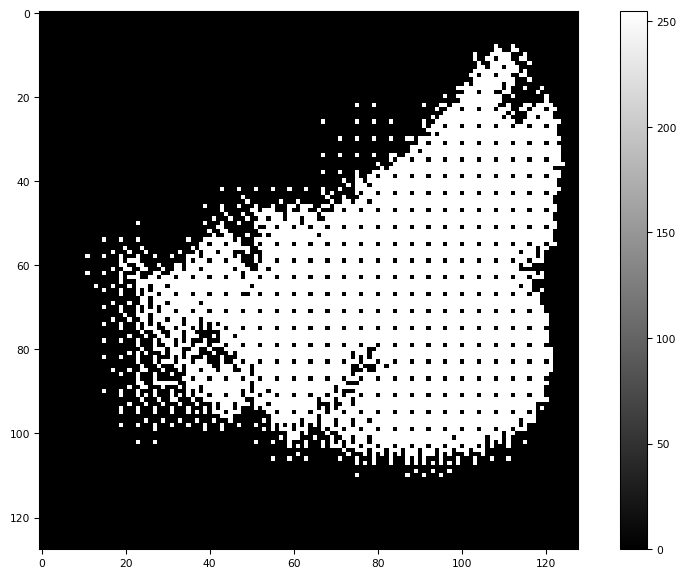

In [ ]:
tiff.imshow(p1,cmap="gray")

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x7fc201898668>)

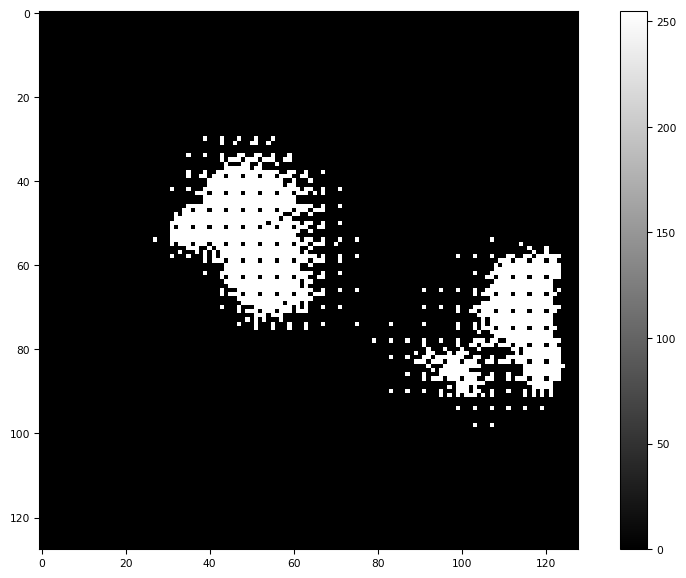

In [ ]:
tiff.imshow(p2,cmap="gray")

In [ ]:
P3 = p1 -p2
alrt = 0

In [ ]:
startLan, startLat = 40.8078679, -73.9632191
pXlatChange = 7.2/(111*1000)

In [ ]:
x=[]
for i in range (0,128):
  for j in range(0,128):
    if P3[i][j]<0:
      trueLatChange = startLan + p[i][j] * pXlatChange
      trueLonChange = startLat + p[i][j] * pXlatChange
      x.append([trueLatChange,trueLonChange])
      alrt = alrt+1

In [ ]:
if(alrt*7.2 > 40):
  print("arert !!!")

In [ ]:
x=np.asarray(x)

In [ ]:
x

array([[[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-73.96322]],

       [[ 40.80787],
        [-7

In [ ]:
# c1 = 0
# c2 = 0
# for i in range(0,128): 
#   for j in range(0,128):
#     if(p1[i][j]==255):
#       c1 = c1 + 1
#     else:
#       c2 = c2 + 1

# print("c1 ",c1)
# print("c2 ",c2)
# # to count c2

In [ ]:
x = []
x2 = []

In [ ]:
px1 = 0
px2 = 1
for i in range(0,128): 
  for j in range(0,128):
    if(p1[i][j]==255):
      px1 = px1 + 1

for i in range(0,128): 
  for j in range(0,128):
    if(p2[i][j]==255):
      px2 = px2 + 1

In [ ]:
totalPxArea = 128 * 128
totalArea = 1000*1000

In [ ]:
areaPro1=(px1/totalPxArea)*totalArea
areaPro2=(px2/totalPxArea)*totalArea
difference_of_area = areaPro1 - areaPro2
print("Difference : ",difference_of_area)

243774.4140625
